In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.io as spi
%matplotlib inline

In [2]:
%run femshape/pca

In [3]:
%run femshape/femshape

space = Space(order=4, meshsize=3,L=1)

In [4]:
%run femshape/utils

# Saving and fetching data

In [5]:
np.random.seed(0)

In [6]:
import scipy.io as spi
ncurves = 200
npoints = 500
x,y = randshapes(ncurves,npoints)
x[0], y[0] = figure_of_eight(npoints)
spi.savemat('currents_data_200_500.mat',{'x':x,'y':y})

In [7]:
def load_data(name, ncurves):
    data = spi.loadmat(name)
    x = data['x']
    y = data['y']
    x = x[:ncurves]
    y = y[:ncurves]
    return x, y

# Separate a figure of 8

In [8]:
x,y = load_data('currents_data_200_500.mat', 20)

## Separate using the finite element representers

In [9]:
curves = np.stack([x,y], axis=-1)
currents = [Current(space, curve) for curve in curves]
reps = [Representer(current, scale=.3) for current in currents]

In [10]:
pe = pca_data(reps, 1)

In [11]:
pca = PCA(pe, x, y)

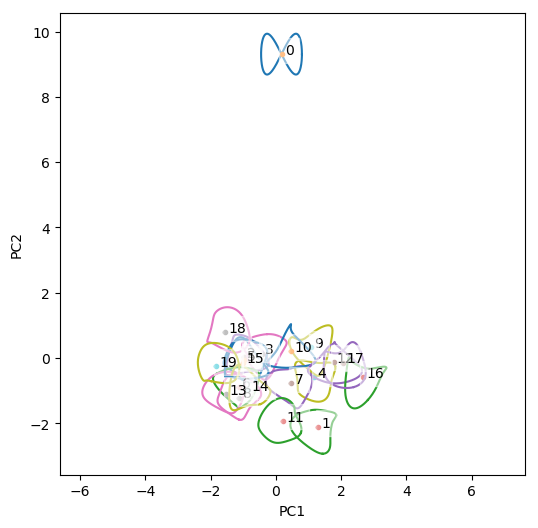

In [12]:
plt.figure(figsize=(6,6))
pca.plot(scaling=.8, shift=(.1,0))
plt.axis('equal');

### Using the monomial representers

In [13]:
%run femshape/monomials.py

<Figure size 300x300 with 0 Axes>

In [14]:
ncurves, npoints = x.shape
cl = (npoints-1)*np.ones((1,ncurves),dtype=int)
u = representer(x,y,ncurves,cl,npoints,10)
u1 = np.zeros((ncurves,np.shape(u)[1]*np.shape(u)[2]*2))
for i in range(ncurves):
    u1[i,:] = np.matrix.flatten(u[i,:,:,:])

In [15]:
pca = PCA(u1, x, y)

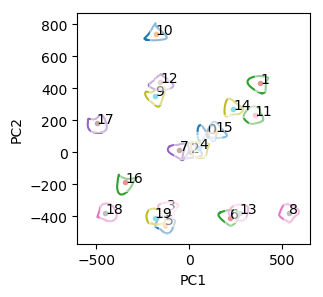

In [16]:
pca.plot(scaling=.01)

# Bigger data set

In [17]:
x_, y_ = load_data('currents_data_200_500.mat', 32)

Remove the figure eight:

In [18]:
x, y = x[1:], y[1:]

## PCA on the FEM representer space

In [19]:
curves = np.stack([x,y], axis=-1)
reps = [Representer(Current(space, curve)) for curve in curves]

In [20]:
pe = pca_data(reps)

In [21]:
pca = PCA(pe, x, y)

(-2.374431028903142,
 2.4735343931288343,
 -3.1631259537567544,
 2.2577044270659843)

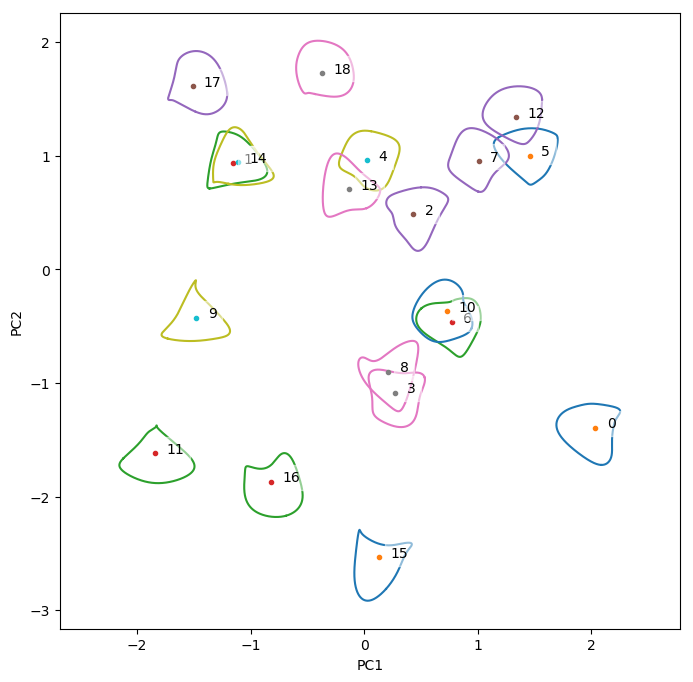

In [22]:
plt.figure(figsize=(8,8))
pca.plot(scaling=2, shift=(.1,0))
plt.axis('equal')

1.0608830678327599
0.7255722712676727


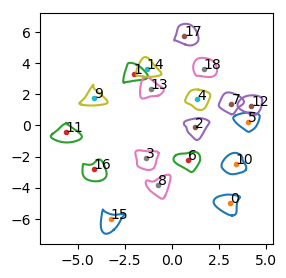

In [23]:
pca_opt(pca, scaling=2)

### PCA with monomial representers

In [24]:
ncurves, npoints = x.shape
cl = (npoints-1)*np.ones((1,ncurves),dtype=int)
u = representer(x,y,ncurves,cl,npoints,10)
u1 = np.zeros((ncurves,np.shape(u)[1]*np.shape(u)[2]*2))
for i in range(ncurves):
    u1[i,:] = np.matrix.flatten(u[i,:,:,:])

In [25]:
pca = PCA(u1, x, y)

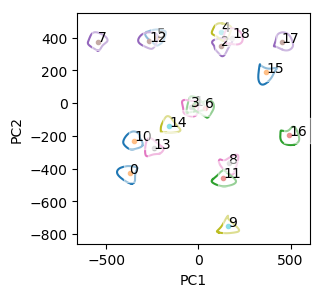

In [26]:
pca.plot(scaling=.01)

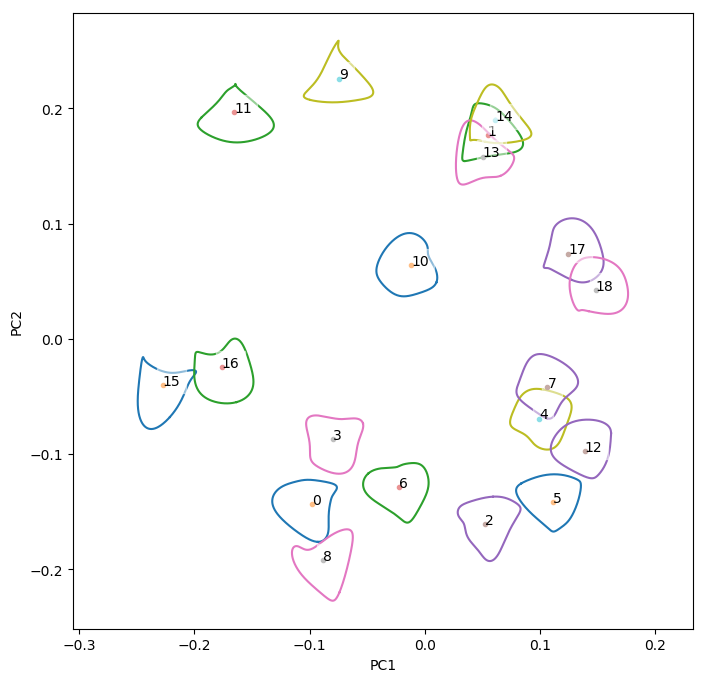

In [27]:
pe = monomial_current_pca(x, y, 10)
pca = PCA(pe, x, y)
plt.figure(figsize=(8,8))
pca.plot(scaling=20)
plt.axis('equal');

0.10799305219117268
0.07234734783907593


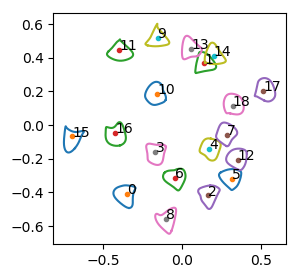

In [28]:
pca_opt(pca, scaling=20)

d(0,1), d(0,2), d(0,3)
order 1, mesh = 10, 20, 40
(2.2949783713748606, 2.4006275209345507, 2.2316118057013319)
(1.6047046605854045, 1.6207933275335604, 1.6825498540372308)
(1.2664142928892494, 1.2783837142622918, 1.3259963291001282)

order 4, mesh = 5, 10, 20
(2.2997301392640863, 2.2460204102017722, 2.2746276352501957)
(1.7498901419675774, 1.7855146077354773, 1.7592703776709591)

d(0,1), d(0,2), d(1,2)
order 4, mesh = 5, 10, 20
(2.7899967862469111, 2.8270892665201925, 0.8246409669811765)
(2.8852668644254802, 2.9246305575121454, 1.0339455136119406)
(2.9389698376057898, 2.9713066427066308, 1.1315582359980916)